In [281]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [282]:
from math import sqrt

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from scipy.spatial import distance

In [283]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [284]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [285]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age and Cabin have high number of null values present in them.

In [286]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [287]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


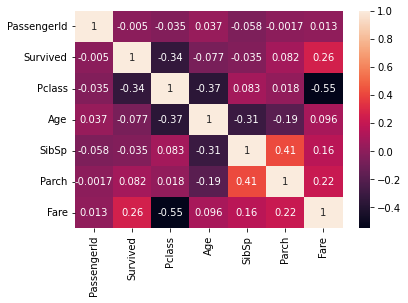

In [288]:
sns.heatmap(df_train.corr(), annot=True);

* Correlation for Survived is highest with Fare at 0.26.
* Highest Correlation is seen between Parch and SibSp at 0.41.

### Some Visualizations

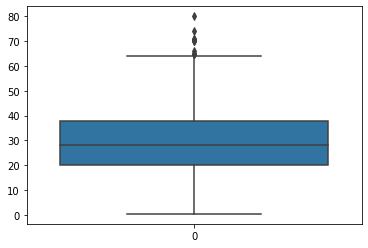

In [289]:
sns.boxplot(data=df_train["Age"]);

Plotting the outliers for the Age column

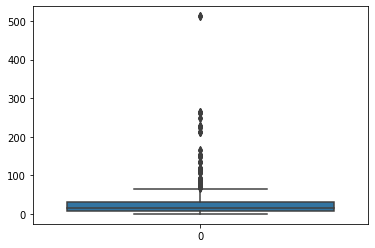

In [290]:
sns.boxplot(data=df_train["Fare"]);

Boxplot for the Fare column, showing the outliers.

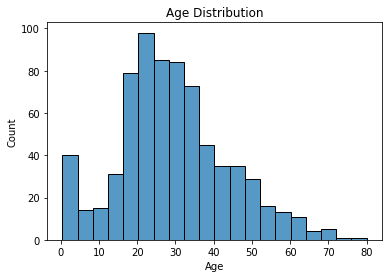

In [291]:
sns.histplot(data=df_train["Age"]).set_title("Age Distribution");

Age is normal between 20-25 with a good number of outliers on the left side.

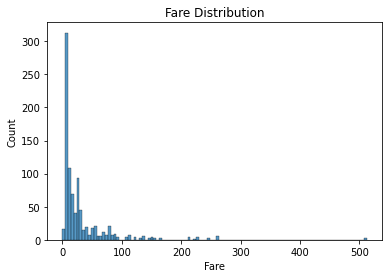

In [292]:
sns.histplot(data=df_train["Fare"]).set_title("Fare Distribution");

Fare is normal around 10 but some extreme outliers remain in the dataset.

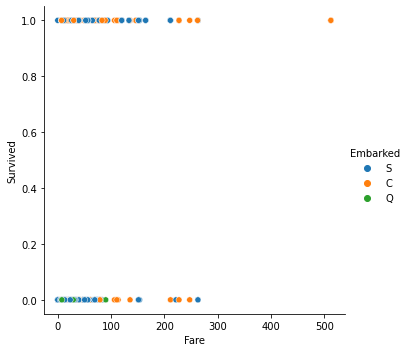

In [293]:
sns.relplot(x=df_train["Fare"], y=df_train["Survived"], hue=df_train["Embarked"]);

Plotting the Relation between Survival and Ticket Fare and using Embarkation Point for hue.

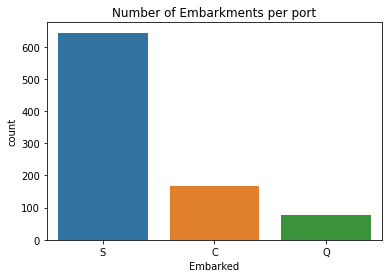

In [294]:
sns.countplot(x=df_train["Embarked"]).set_title("Number of Embarkments per port");

Southampton has the highest number of embarkments of all ports.

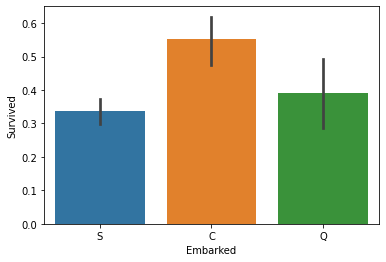

In [295]:
sns.barplot(x=df_train["Embarked"], y=df_train["Survived"]);

This plot shows that passengers who embarked on Cherbourg had the best chance of survival.

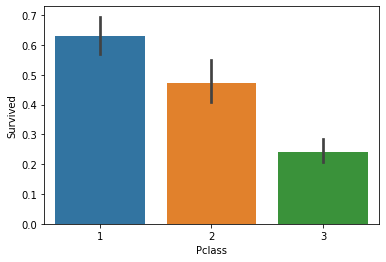

In [296]:
sns.barplot(x=df_train["Pclass"], y=df_train["Survived"]);

This plot shows that Passengers with a ticket class of 1 had the best chance of survival.

### Preprocessing

In [297]:
# training
age_mean = df_train['Age'].mean()
df_train['Age'].fillna(round(age_mean), inplace=True)
df_train['Embarked'].fillna(method = 'bfill', inplace = True)
df_train.drop(['Cabin'], axis=1, inplace=True)

#testing
age_mean_test = df_test['Age'].mean()
fare_mean_test = df_test['Fare'].mean()
df_test['Age'].fillna(round(age_mean_test), inplace=True)
df_test['Fare'].fillna(round(fare_mean_test), inplace=True)
df_test['Embarked'].fillna(method = 'bfill', inplace = True)
df_test.drop(['Cabin'], axis=1, inplace=True)

* Filled the Null Age values with the mean of the non-null ages present in dataset.
* We filled the Embarked null values using the bfill method, which uses the previous available value.
* Dropped the cabin column as it has too many null values and is not relevant towards survival.

In [298]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [299]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [300]:
def scale(num_features):
    min_max_scaler = MinMaxScaler()
    num_features = min_max_scaler.fit_transform(num_features)
    return pd.DataFrame(num_features)

#One hot encode categorical features
def one_hot_encode(cat_features):
    one_hot_enc = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
    cat_features_one_hot = pd.DataFrame(one_hot_enc.fit_transform(cat_features))
    return pd.DataFrame(cat_features_one_hot)

#Normalize data according to data type
def normalize_data(df):
    cat_features = df.select_dtypes(include = 'object')
    num_features = df.select_dtypes(exclude = 'object')
    
    cat_features = one_hot_encode(cat_features)
    num_features = scale(num_features)

    df = pd.concat([num_features, cat_features], axis = 1)
    return df.to_numpy()

In [301]:
X = df_train[['Age', 'Fare', 'SibSp', 'Parch', 'Sex', 'Pclass', 'Embarked']]
X = normalize_data(X)
y = df_train['Survived'].to_numpy()

X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size = 0.8, test_size = 0.2)

In [302]:
#Test
X_test = df_test[['Age', 'Fare', 'SibSp', 'Parch', 'Sex', 'Pclass', 'Embarked']]
X_test = normalize_data(X_test)

In [303]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_dev)
accuracy = accuracy_score(y_dev, y_pred)
print('Accuracy with KNN Classifier is {}'.format(accuracy))

Accuracy with KNN Classifier is 0.7877094972067039


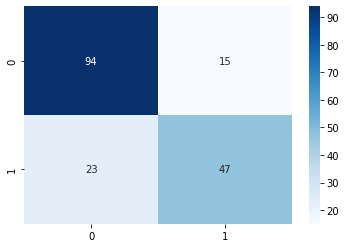

In [304]:
confusion_m = confusion_matrix(y_dev, y_pred)

sns.heatmap(confusion_m, annot=True, cmap = 'Blues');

In [305]:
#Final testing
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

In [306]:
#Create output file
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
submission.to_csv('submission.csv', index = False)

In [307]:
submission['Survived'].value_counts()

0    271
1    147
Name: Survived, dtype: int64